In [10]:
from astropy.io import fits
image_data = fits.open('ngc1261.fits')[0]

from astropy.stats import sigma_clipped_stats
data = image_data.data[2000:3000,5000:6000]
mean, median, std = sigma_clipped_stats(data,sigma=3.0)
print((mean,median,std))

(1.1240114, 0.0, 7.6460776)


In [11]:
from photutils.detection import DAOStarFinder
daofind = DAOStarFinder(fwhm=50.0,threshold=5.0*std)
sources = daofind(data-median)
for col in sources.colnames:
    if col not in ('id','npix'):
        sources[col].info.format = '%.2f'
sources.pprint(max_width=76)

 id xcentroid ycentroid sharpness roundness1 ... sky    peak   flux   mag 
--- --------- --------- --------- ---------- ... ---- ------- ------ -----
  1    409.37    175.24      0.44      -0.70 ... 0.00   21.00  12.59 -2.75
  2    631.18    345.10      0.76       0.80 ... 0.00  167.00  52.01 -4.29
  3    885.44    478.32      0.51      -0.35 ... 0.00   78.00  36.20 -3.90
  4    296.46    577.64      0.68      -0.20 ... 0.00  394.00 139.39 -5.36
  5     63.78    617.93      0.39      -0.15 ... 0.00  225.00 118.00 -5.18
  6    411.14    635.10      0.72       0.37 ... 0.00   79.00  26.78 -3.57
  7     66.59    706.19      0.24       0.22 ... 0.00   40.00  27.28 -3.59
  8    635.08    716.05      0.91       0.03 ... 0.00  751.00 202.60 -5.77
  9    356.59    715.59      0.39      -0.51 ... 0.00   66.00  31.84 -3.76
 10    631.65    744.91      0.51      -0.02 ... 0.00  434.00 188.47 -5.69
 11    175.14    758.32      0.91      -0.04 ... 0.00  598.00 165.22 -5.55
 12    968.12    793.60  

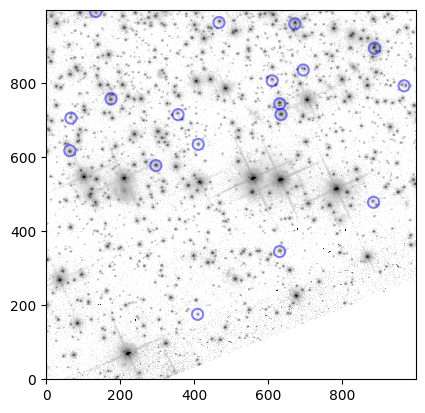

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
from matplotlib.colors import LogNorm

positions = np.transpose((sources['xcentroid'],sources['ycentroid']))
apertures = CircularAperture(positions,r=15.0)
norm = ImageNormalize(stretch = SqrtStretch())
plt.imshow(data,cmap='Greys',origin='lower',norm=LogNorm(),interpolation='nearest')
apertures.plot(color='blue',lw=1.5,alpha=0.5)

In [42]:
from astropy.stats import sigma_clipped_stats
from photutils.detection import find_peaks
mean, median, std = sigma_clipped_stats(data,sigma=100000.0)
threshold = median + (1.0*std)
tbl = find_peaks(data,threshold,box_size=11)
tbl['peak_value'].info.format = '%8g'
print(tbl[:10])

x_peak y_peak peak_value
------ ------ ----------
   193      6       2448
   253     16       3247
   414     38       2394
    47     61       2300
    75     64       9044
   216     66      64750
   217     66      64750
   218     66      64750
   219     66      64750
   220     66      64750


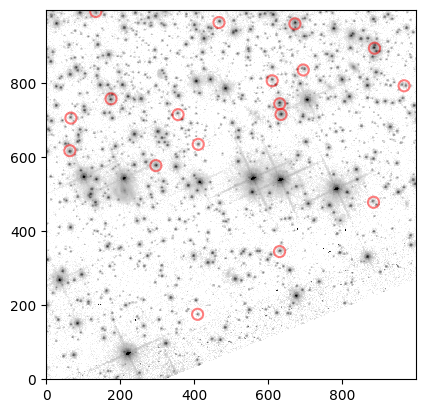

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture

positions = np.transpose((tbl['x_peak'], tbl['y_peak']))
norm = simple_norm(data,'sqrt',percent=99.9)
plt.imshow(data,cmap='Greys',origin='lower',norm=LogNorm(), interpolation = 'nearest')

apertures.plot(color='red',lw=1.5)

In [23]:
print(sigma_clipped_stats(data,sigma=3.0))

(1.1240114, 0.0, 7.6460776)
